# Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz
import math
import shap
from scipy.stats import ttest_ind

# 1. Understanding the Dataset

In [6]:
data = pd.read_csv('../Data/final_project_dataset_complete.csv')

In [7]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [9]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [10]:
data.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [11]:
data["category_1"].unique()

array(['Above Average', 'Below Average', 'High', 'Low'], dtype=object)

In [12]:
data["category_1"].value_counts()

category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

In [13]:
data["category_2"].unique()

array(['Region C', 'Region A', 'Region B'], dtype=object)

In [14]:
data["category_2"].value_counts()

category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

In [15]:
data["target"].value_counts()

target
0    4721
1    4279
Name: count, dtype: int64

In [16]:
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = data.select_dtypes(include=["object", "category"]).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'target']
Categorical Features: ['category_1', 'category_2']


<Figure size 1200x800 with 0 Axes>

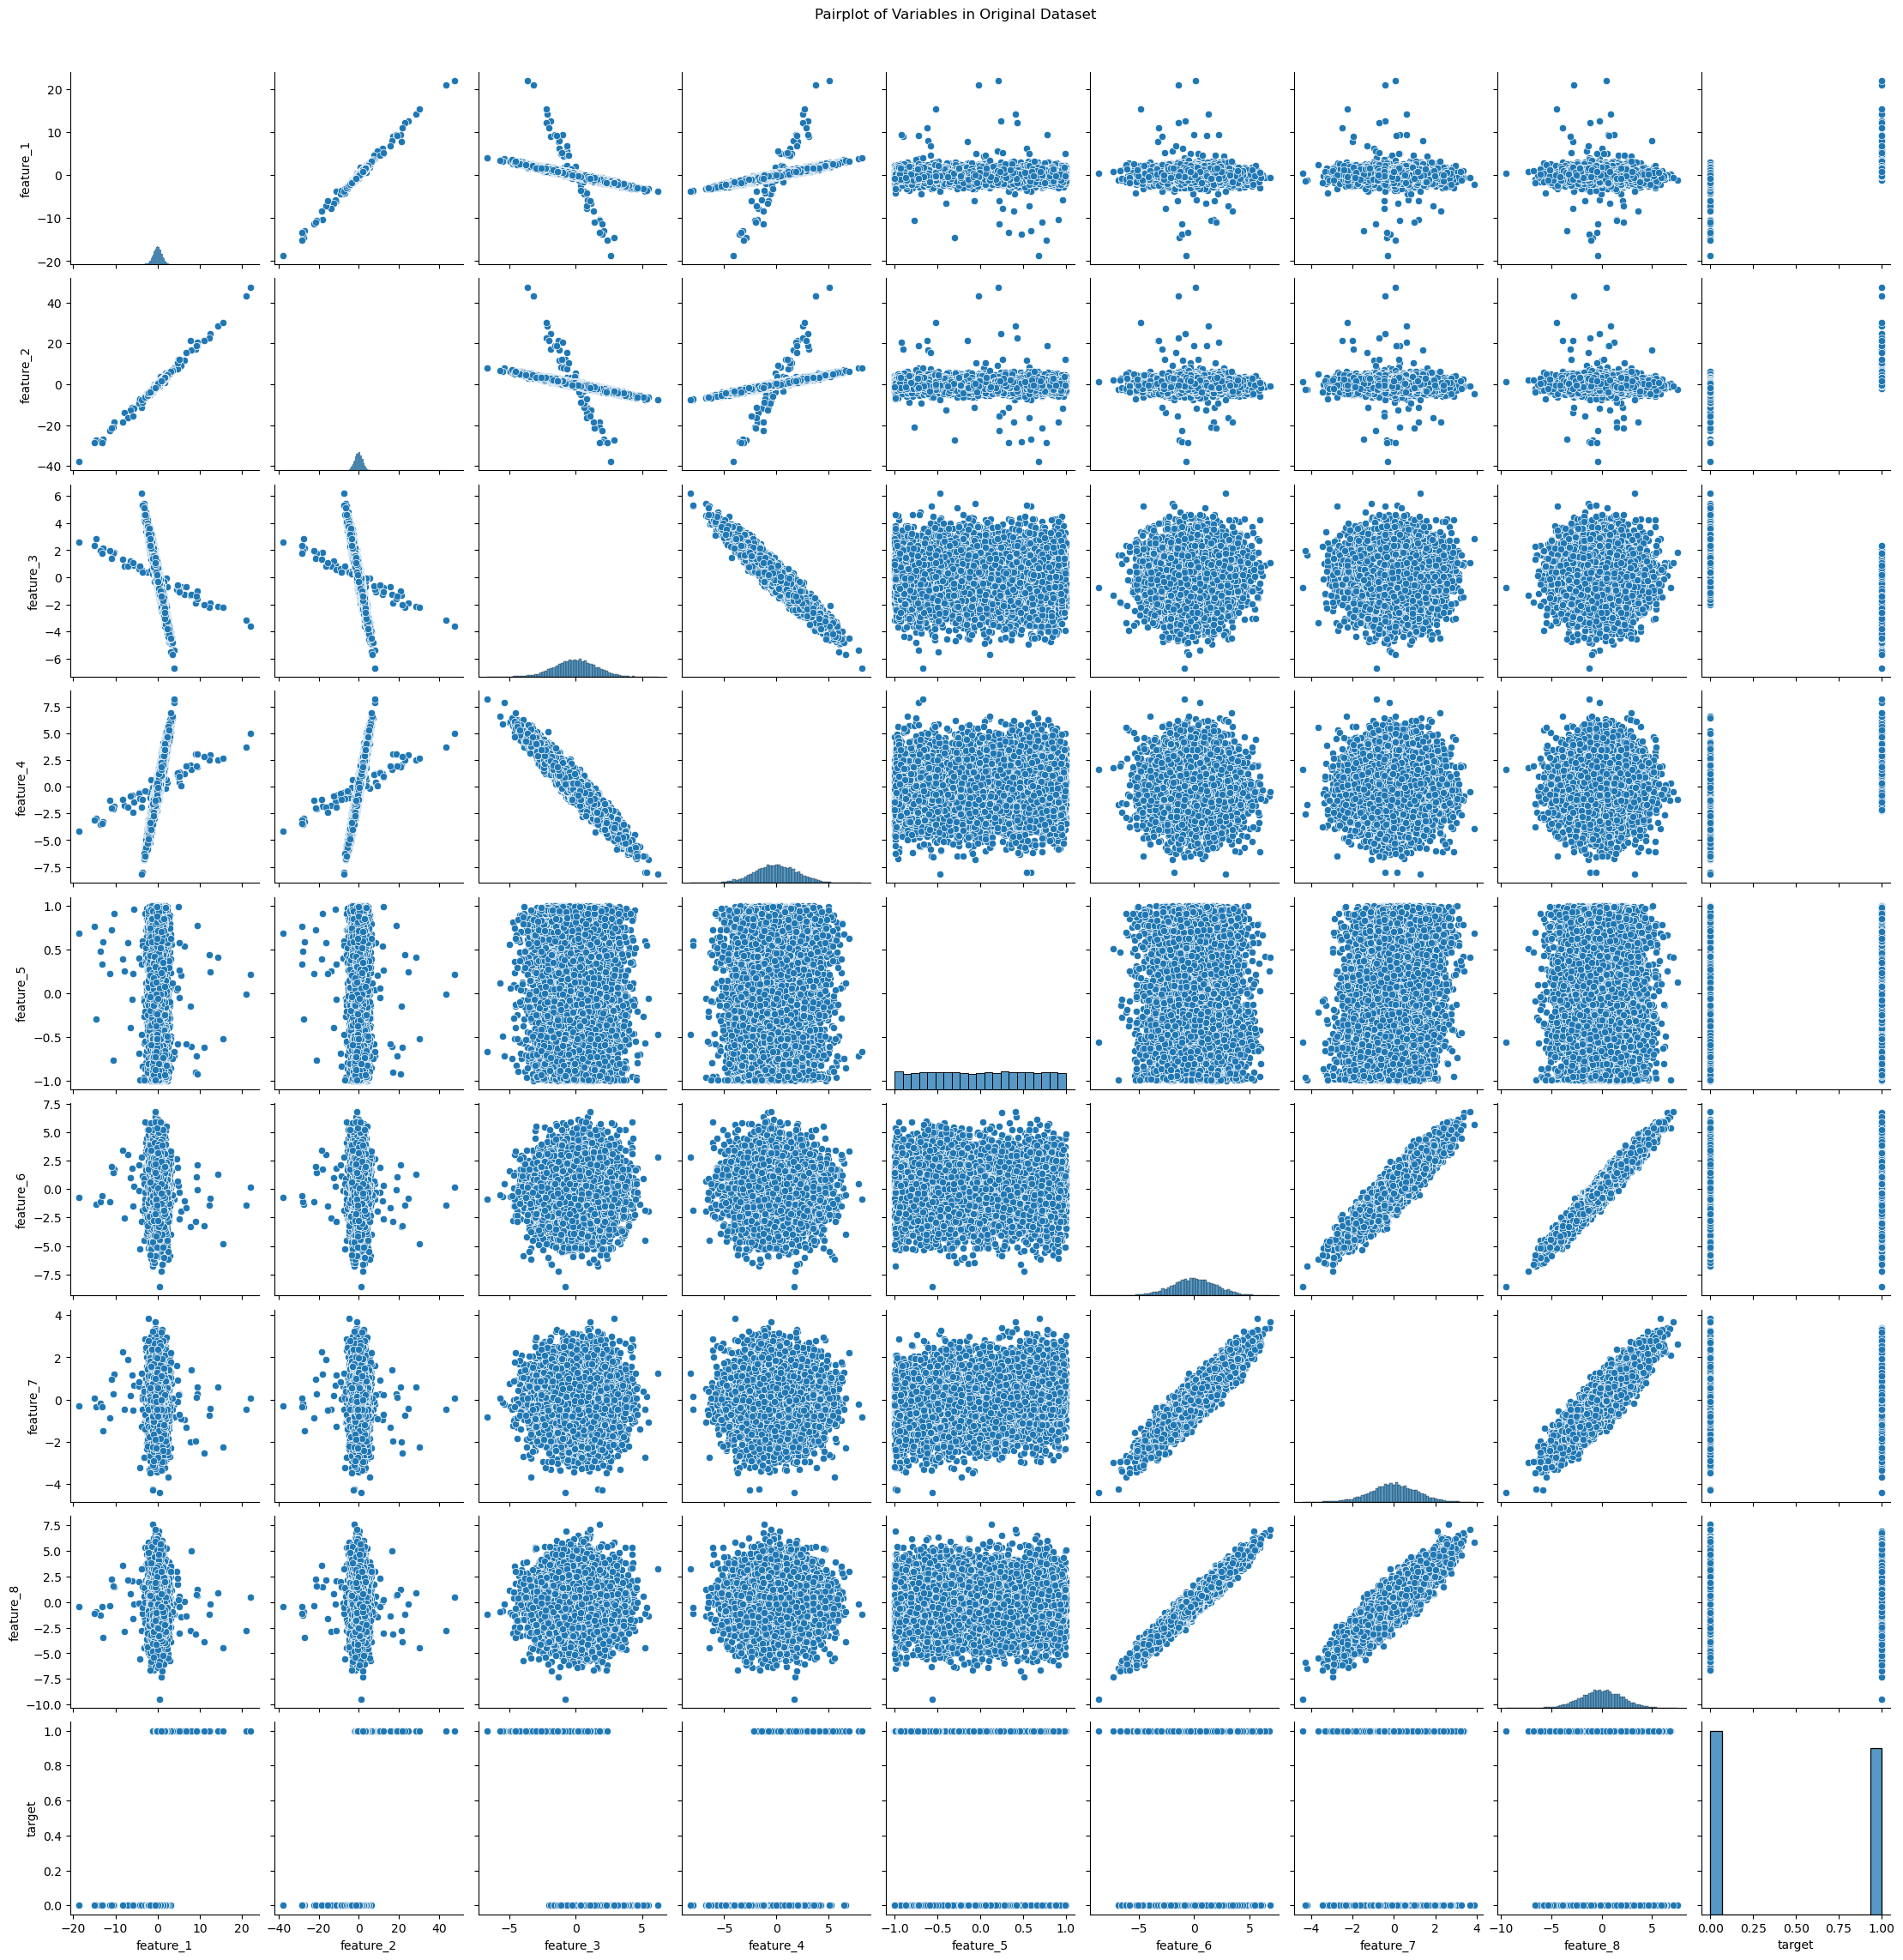

In [17]:
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.suptitle("Pairplot of Variables in Original Dataset", y=1.02)
plt.show()

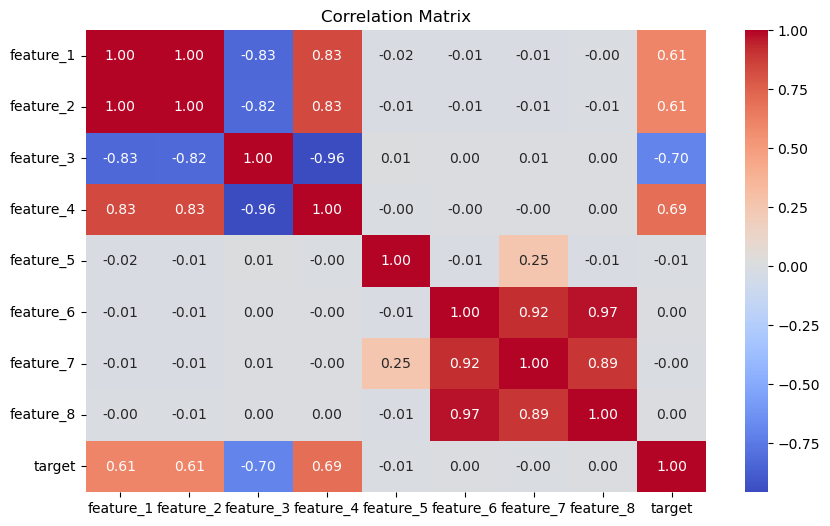

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

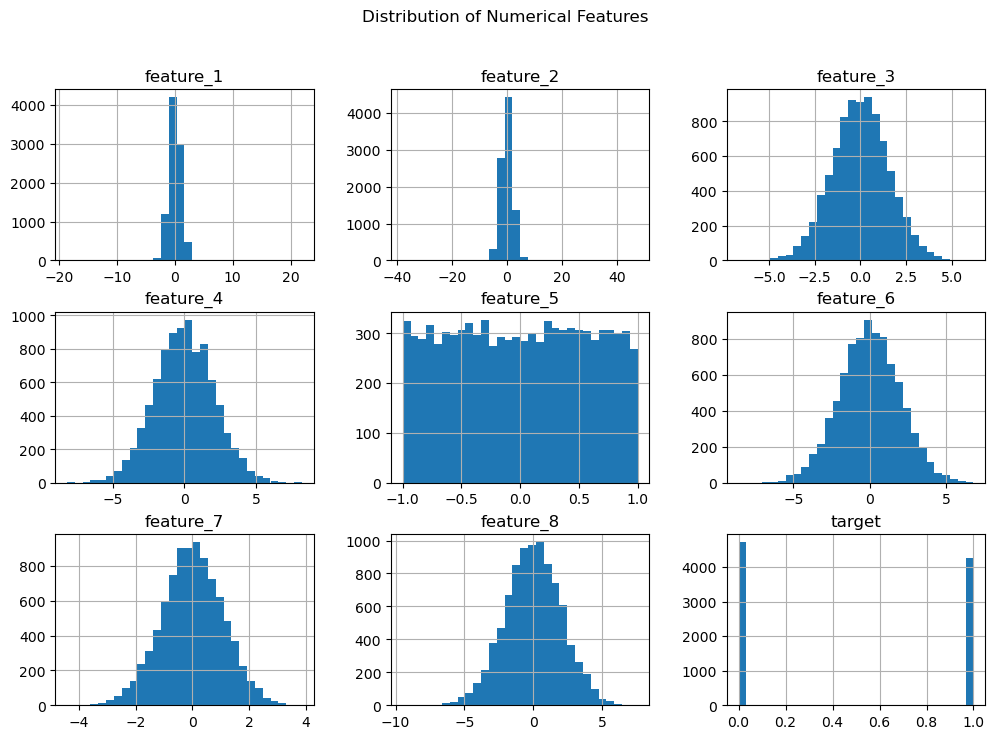

In [19]:
data[numerical_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

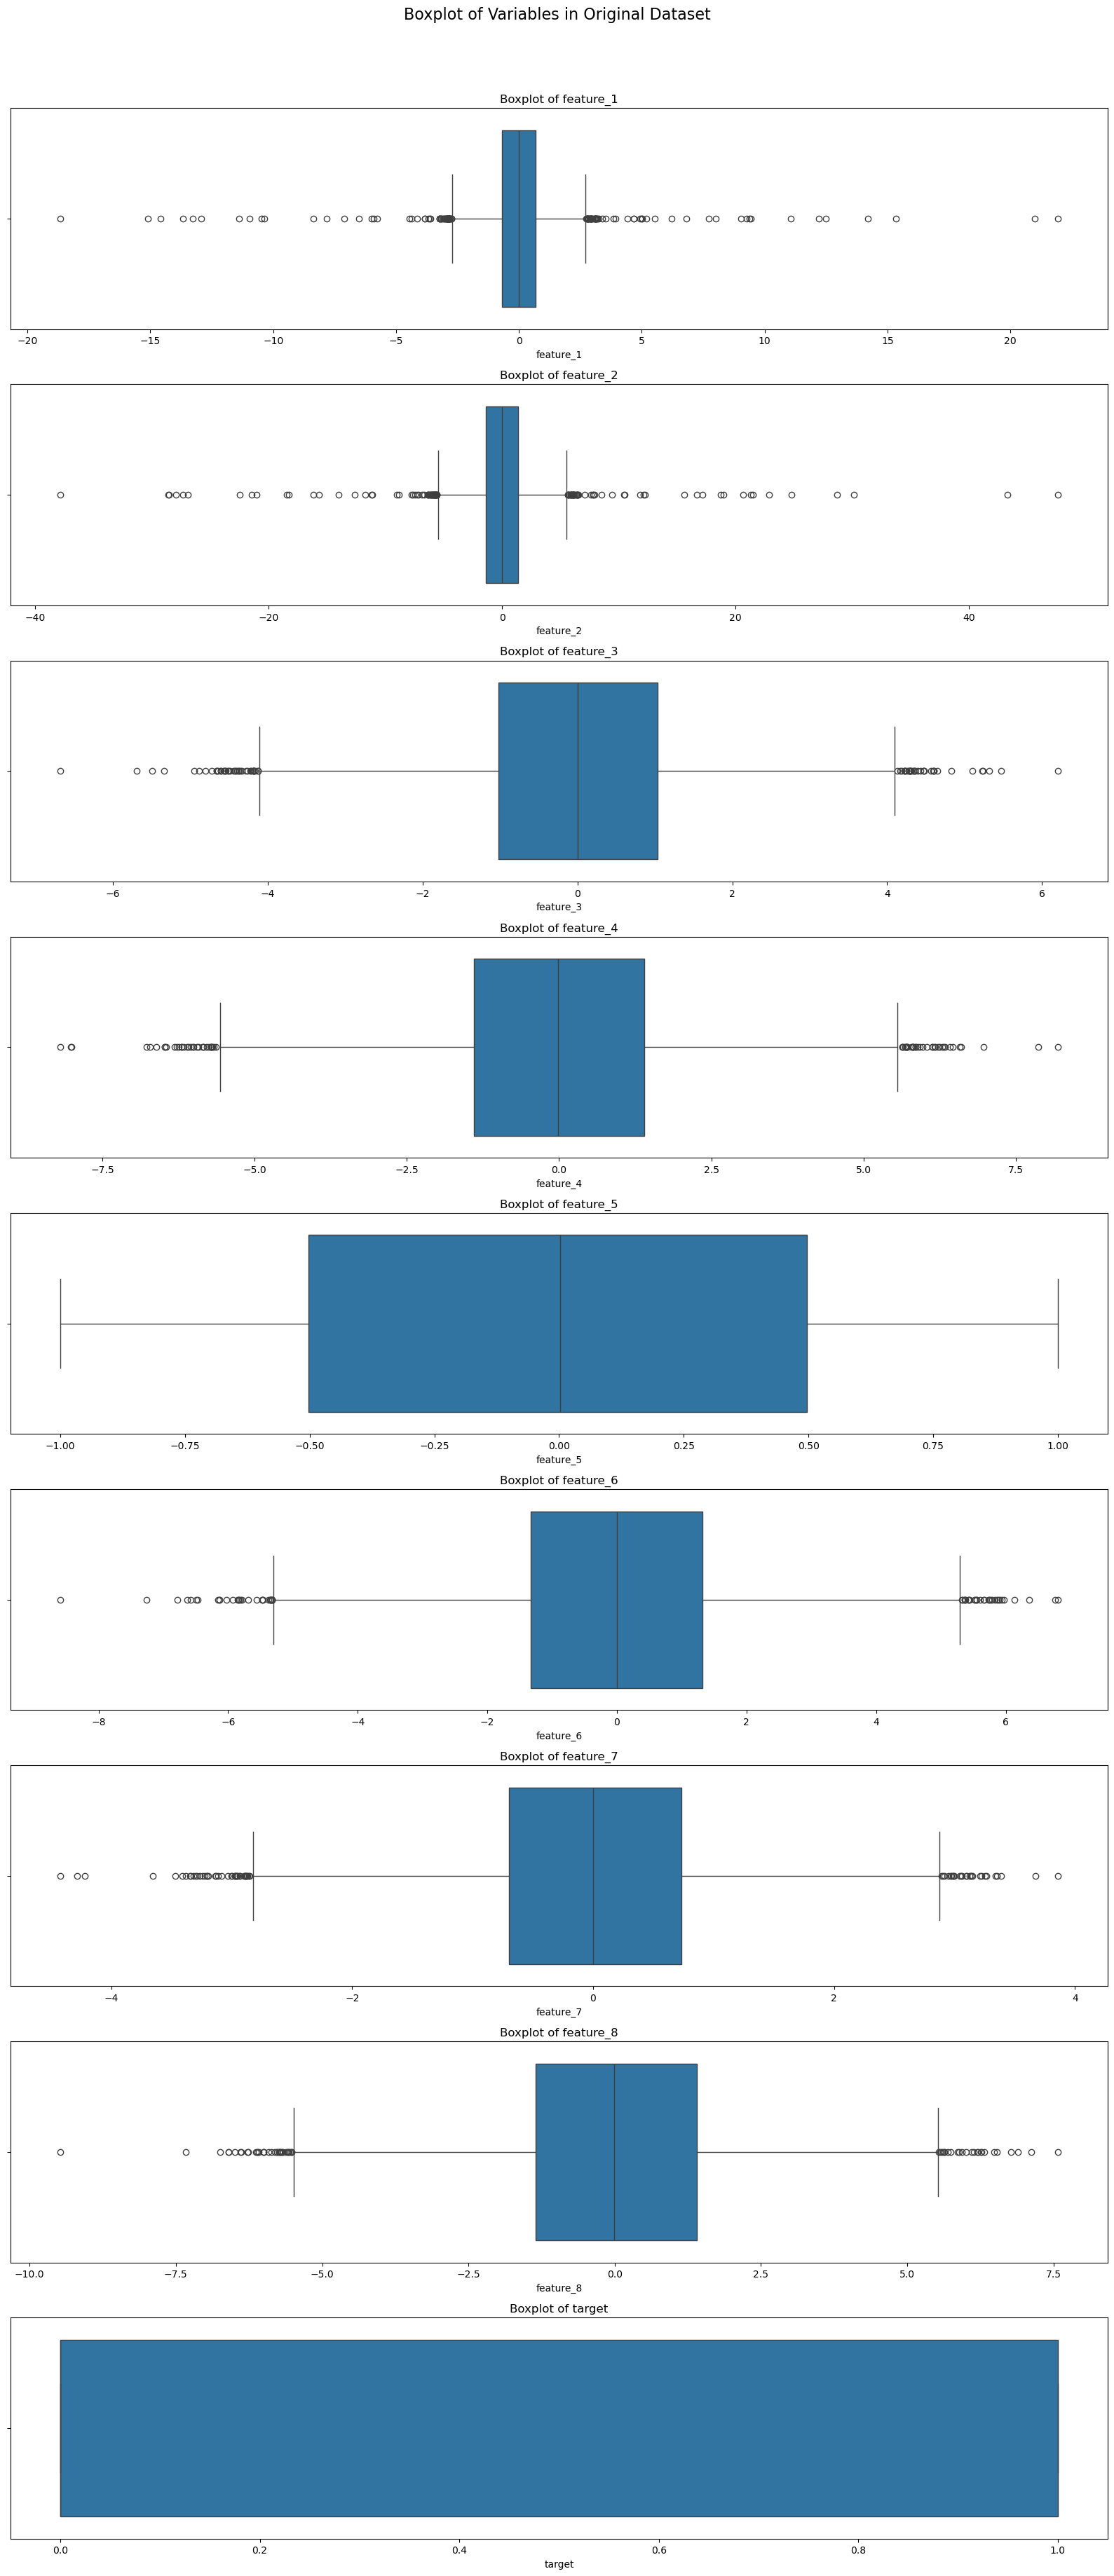

In [20]:
plt.figure(figsize=(16, len(numerical_features) * 4))
plt.suptitle("Boxplot of Variables in Original Dataset", y=1.02, fontsize=16)

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

# 2. Data Preprocessing

## Handle Missing values

In [21]:
data.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [22]:
numerical_imputer = SimpleImputer(strategy="mean")
data_num = data.select_dtypes(include=[np.number])
data[data_num.columns] = numerical_imputer.fit_transform(data_num)

In [23]:
data.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64

## Detect and treat outliers

In [24]:
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lwr_bound = Q1 - 1.5 * IQR
            upp_bound = Q3 + 1.5 * IQR
            outliers_list_col = df.index[(df[col] < lwr_bound) | (df[col] > upp_bound)].tolist()
            outliers[col] = {
                'count': len(outliers_list_col),
                'indexes': outliers_list_col,
                'lower_bound': lwr_bound,
                'upper_bound': upp_bound
            }
        else:
            outliers[col] = {
                'count': 0,
                'indexes': [],
                'lower_bound': None,
                'upper_bound': None
            }
    return outliers

In [25]:
outliers = detect_outliers(data)

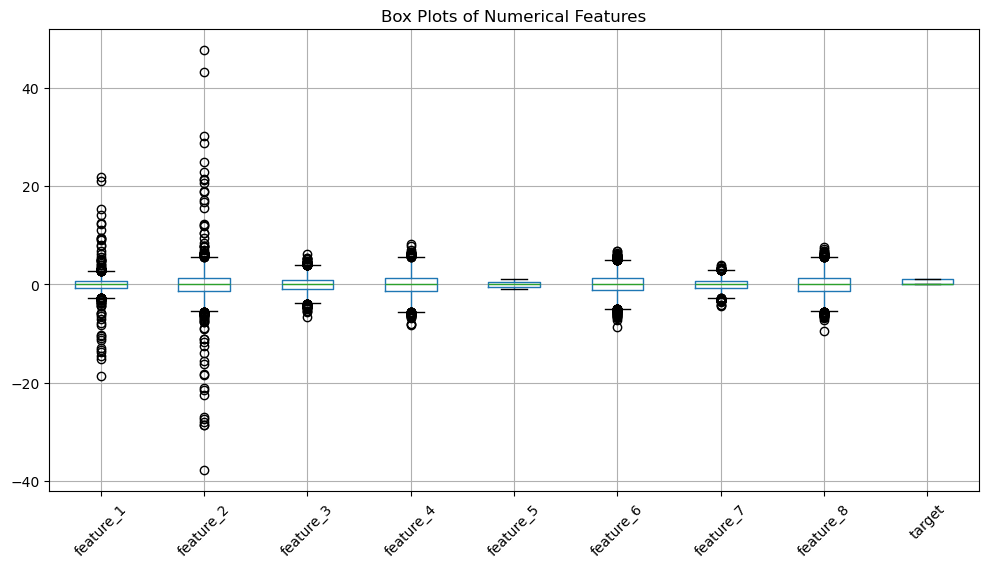

In [26]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [27]:
for col, info in outliers.items():
    print(f"Outliers in {col} (Count: {info['count']}):")
    print(f"Index: {info['indexes']}\n")

Outliers in feature_1 (Count: 113):
Index: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1539, 1591, 1615, 1785, 1957, 1971, 2024, 2035, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2521, 2884, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 4026, 4029, 4033, 4047, 4091, 4198, 4207, 4265, 4359, 4531, 4617, 4635, 4639, 4725, 4779, 4784, 4870, 4997, 5157, 5224, 5316, 5416, 5488, 5587, 5642, 5649, 5673, 5773, 5796, 5846, 5907, 5935, 5998, 6350, 6408, 6628, 6693, 6738, 6747, 6891, 7060, 7140, 7178, 7223, 7290, 7305, 7330, 7441, 7498, 7611, 7624, 7677, 7839, 7851, 7858, 7872, 7874, 8024, 8067, 8165, 8180, 8200, 8248, 8283, 8354, 8630, 8714, 8726]

Outliers in feature_2 (Count: 106):
Index: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1591, 1615, 1785, 1957, 1971, 2024, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 400

In [28]:
def clip_outliers(df, columns):
    for col in columns:
        
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lwr_bound = Q1 - 1.5 * IQR
            upp_bound = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower=lwr_bound, upper=upp_bound)
    return df

In [29]:
columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_6','feature_7','feature_8' ]
data = clip_outliers(data, columns)

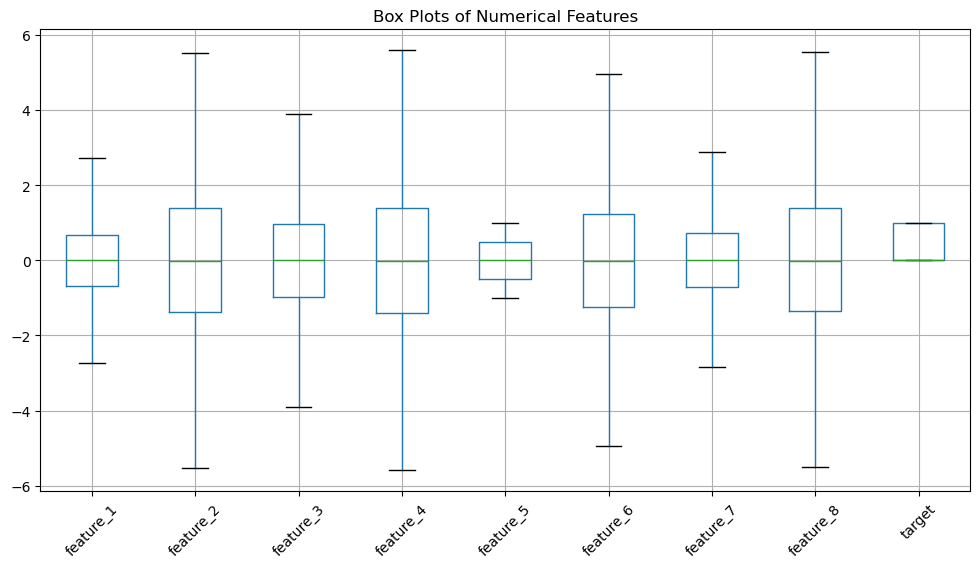

In [30]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## Encode categorical variables

In [31]:
order = [['Low', 'Below Average', 'Above Average', 'High']]
ordinal_encoder = OrdinalEncoder(categories=order)
data["category_1_encoded"] = ordinal_encoder.fit_transform(data[["category_1"]])

In [32]:
data=data.drop('category_1',axis=1)

In [33]:
cat2_encoder = OneHotEncoder(sparse_output=False, drop="first")  
cat2_1hot = cat2_encoder.fit_transform(data[["category_2"]])
encoded_columns = cat2_encoder.get_feature_names_out(["category_2"]) 
data_encoded = pd.DataFrame(cat2_1hot, columns=encoded_columns)
data = pd.concat([data, data_encoded], axis=1).drop(columns=["category_2"])  

In [34]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,category_1_encoded,category_2_Region B,category_2_Region C
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1.0,2.0,0.0,1.0
1,-0.138264,-0.061846,0.003235,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0.0,1.0,0.0,0.0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1.0,3.0,0.0,1.0
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1.0,3.0,1.0,0.0
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0.0,1.0,0.0,1.0


## Scaleing 

In [35]:
columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5','feature_6','feature_7','feature_8' ]
scaler = StandardScaler()
scaler.fit(data[columns])
data[columns] = scaler.transform(data[columns])

## Saving cleaned data

In [36]:
save_path = r"../Data/cleaned_data.csv"
data.to_csv(save_path, index=False)  
print(f"Dataset saved successfully at: {save_path}")

Dataset saved successfully at: ../Data/cleaned_data.csv


# 3. Exploratory Data Analysis (EDA)

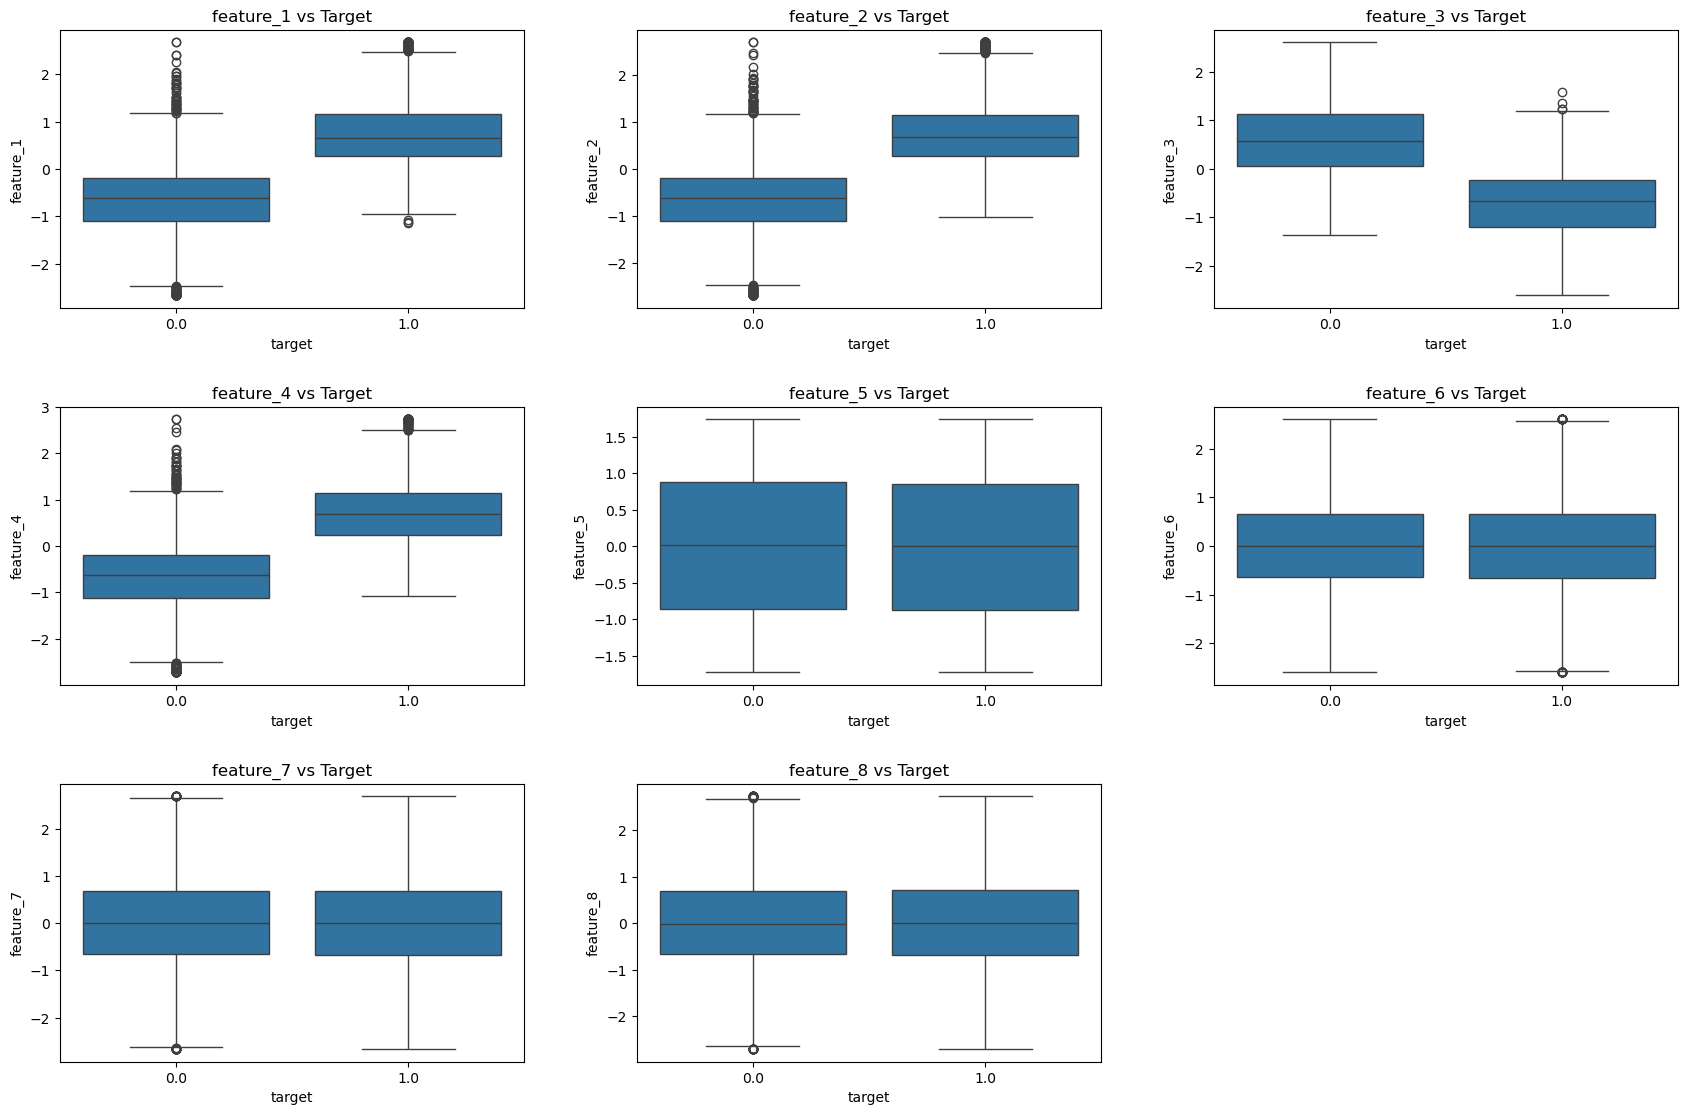

In [37]:
numerical_columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5','feature_6','feature_7','feature_8']

n_cols = 3  
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))  
fig.tight_layout(pad=5.0) 

axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(x='target', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'{column} vs Target')
    axes[i].set_xlabel('target')
    axes[i].set_ylabel(column)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

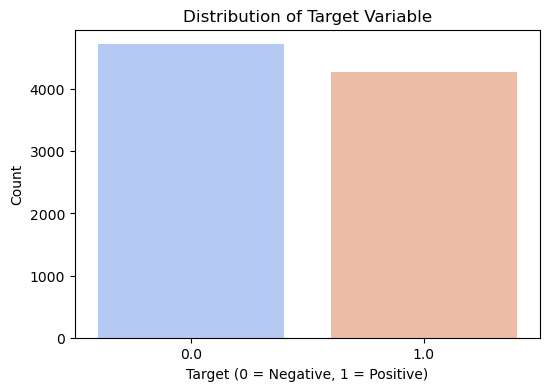

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["target"], hue=data["target"], palette="coolwarm", legend=False)  # Fix applied
plt.title("Distribution of Target Variable")
plt.xlabel("Target (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

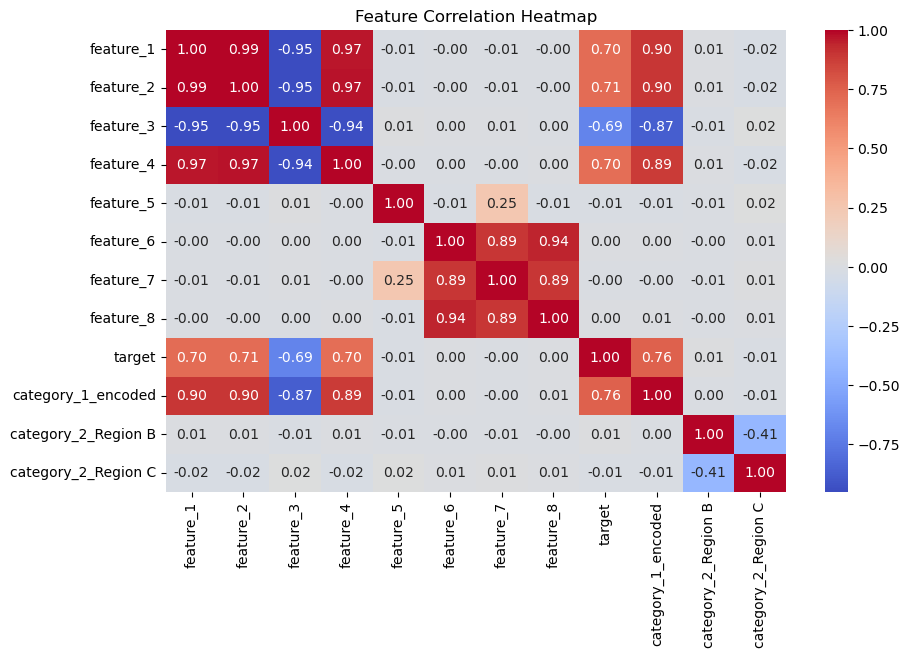

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

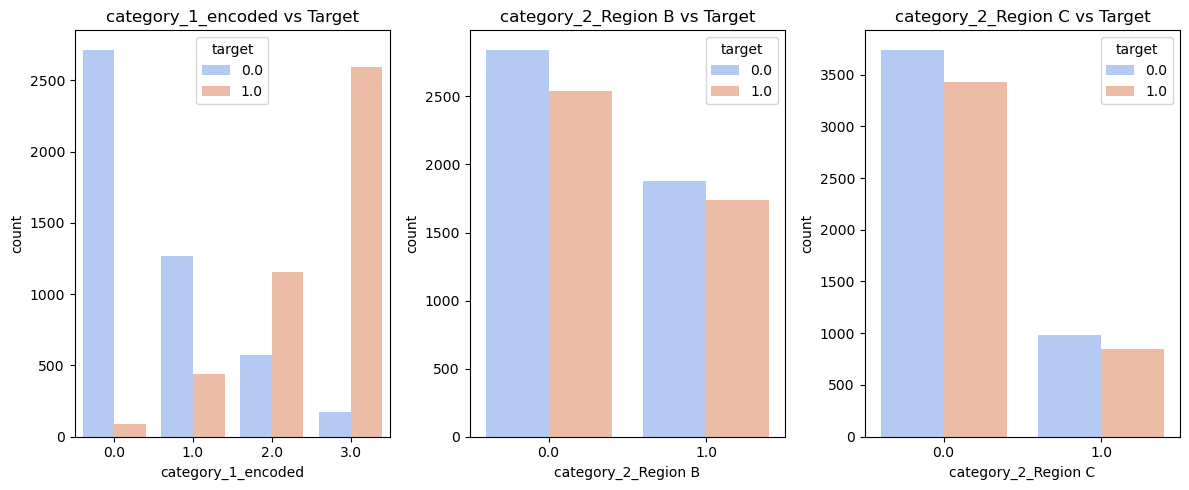

In [40]:
categorical_features = ["category_1_encoded", "category_2_Region B", "category_2_Region C"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue=data["target"], data=data, palette="coolwarm")
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

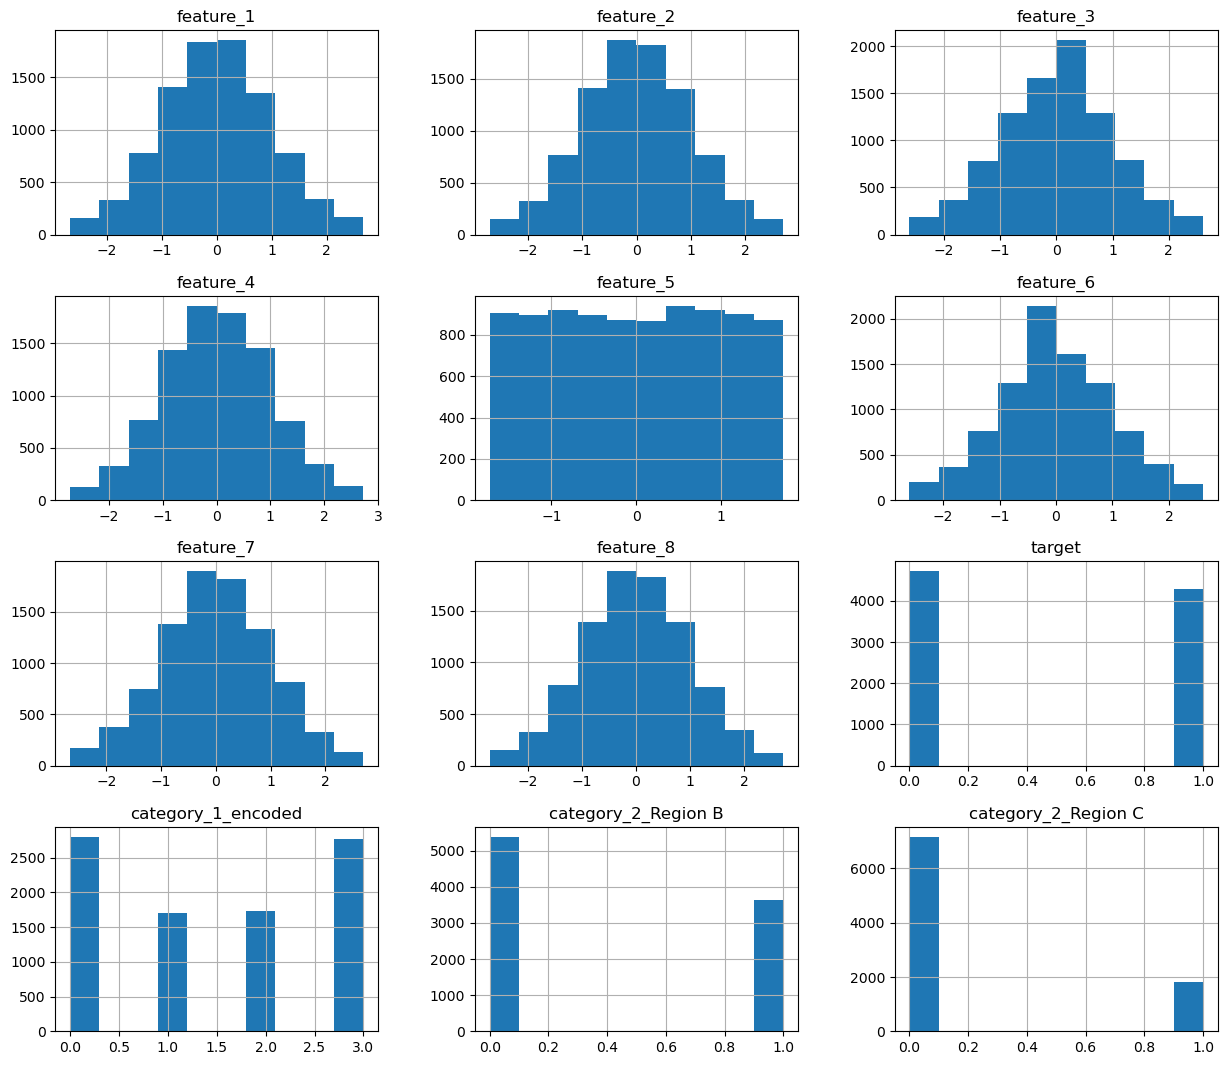

In [41]:
data.hist(figsize=(15,13))
plt.show

## Hypothesis Testing

In [42]:
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns.tolist()

exclude_features = ["target","category_2_Region C", "category_1_encoded", "category_2_Region B"]
numerical_features = [col for col in numerical_features if col not in exclude_features]

for col in numerical_features:
    group_0 = data[data["target"] == 0][col]
    group_1 = data[data["target"] == 1][col]

    t_value, p_value = ttest_ind(group_0, group_1, equal_var=False, nan_policy="omit")

    print(f"T-Test for {col}: t-value = {t_value:.4f}, p-value = {p_value:.4f}")

    if p_value > 0.05:
        print(f" {col} is NOT significantly different between target classes.")
    else:
        print(f" {col} is significantly different (useful for prediction).")


T-Test for feature_1: t-value = -94.4858, p-value = 0.0000
 feature_1 is significantly different (useful for prediction).
T-Test for feature_2: t-value = -95.3020, p-value = 0.0000
 feature_2 is significantly different (useful for prediction).
T-Test for feature_3: t-value = 91.2121, p-value = 0.0000
 feature_3 is significantly different (useful for prediction).
T-Test for feature_4: t-value = -92.6618, p-value = 0.0000
 feature_4 is significantly different (useful for prediction).
T-Test for feature_5: t-value = 0.7471, p-value = 0.4550
 feature_5 is NOT significantly different between target classes.
T-Test for feature_6: t-value = -0.1755, p-value = 0.8607
 feature_6 is NOT significantly different between target classes.
T-Test for feature_7: t-value = 0.1990, p-value = 0.8422
 feature_7 is NOT significantly different between target classes.
T-Test for feature_8: t-value = -0.4722, p-value = 0.6368
 feature_8 is NOT significantly different between target classes.


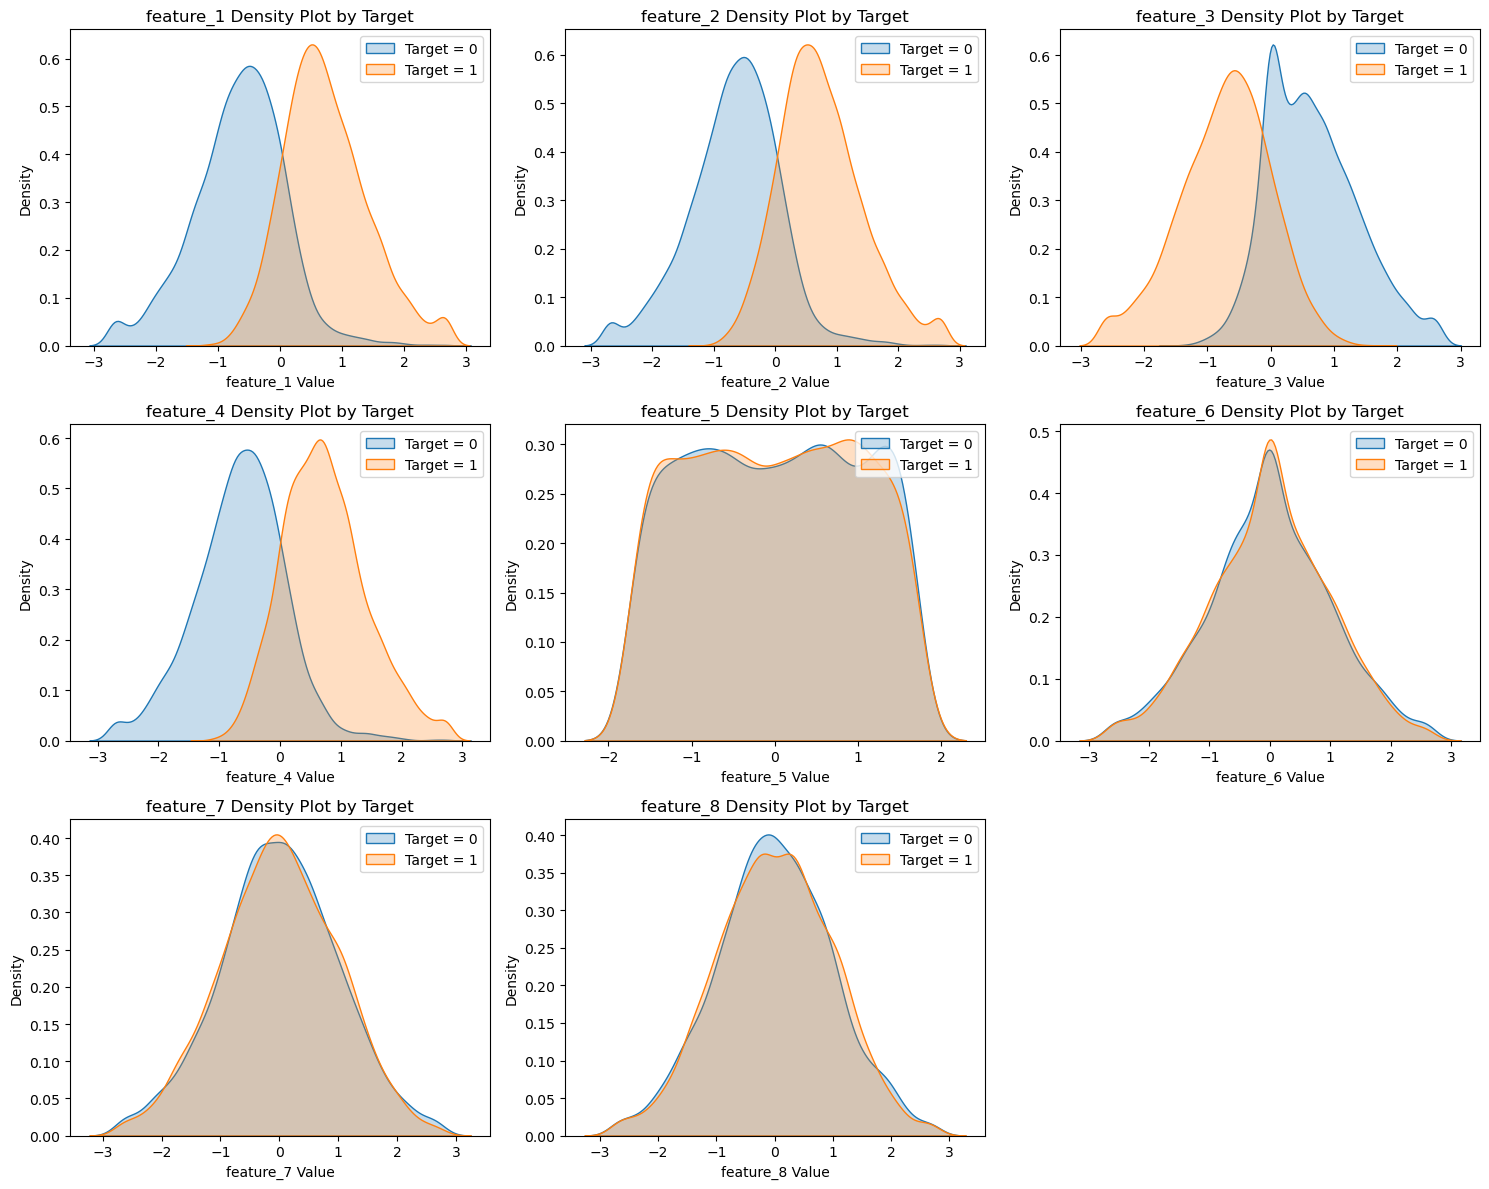

In [43]:
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns.tolist()

exclude_features = ["target","category_1_encoded", "category_2_Region C", "category_2_Region B"]
numerical_features = [col for col in numerical_features if col not in exclude_features]

num_features = len(numerical_features)
rows = (num_features // 3) + (num_features % 3 > 0)  

plt.figure(figsize=(15, rows * 4))  

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)  
    sns.kdeplot(data=data[data["target"] == 0][feature], label="Target = 0", fill=True)
    sns.kdeplot(data=data[data["target"] == 1][feature], label="Target = 1", fill=True)
    plt.title(f"{feature} Density Plot by Target")
    plt.xlabel(f"{feature} Value")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

In [44]:
category_1_target_table = pd.crosstab(data['category_1_encoded'], data['target'])
chi2_stat_cat1, p_value_cat1, dof_cat1, expected_cat1 = chi2_contingency(category_1_target_table)
chi2_stat_cat1, p_value_cat1, dof_cat1

(5175.3202871143785, 0.0, 3)

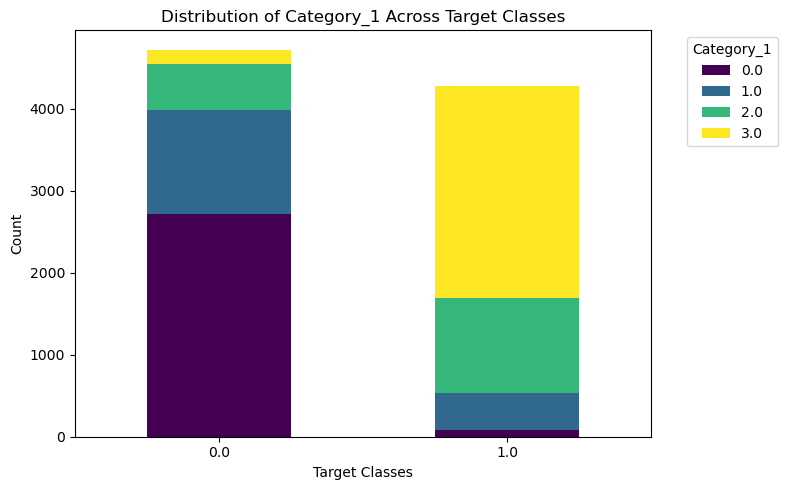

In [45]:
contingency_table = pd.crosstab(data['target'], data['category_1_encoded'])

contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')

plt.title("Distribution of Category_1 Across Target Classes")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category_1", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
contingency_table = pd.crosstab(data['target'], data[['category_2_Region B', 'category_2_Region C']].idxmax(axis=1))
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2-stat = {chi2_stat}, p-value = {p_val}")

Chi-Square Test: chi2-stat = 0.996511801332656, p-value = 0.31815602448744607


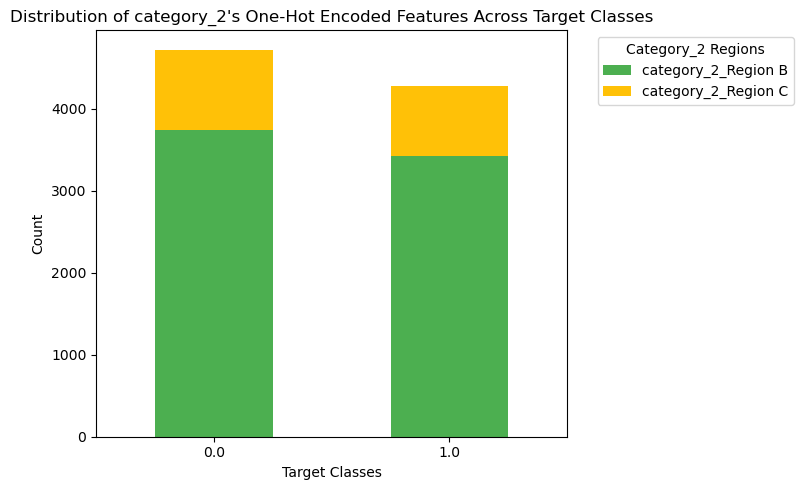

In [47]:
contingency_table = pd.crosstab(data['target'], data[['category_2_Region B', 'category_2_Region C']].idxmax(axis=1))

contingency_table.plot(kind='bar', stacked=True, figsize=(8,5), color=['#4CAF50', '#FFC107', '#2196F3'])

plt.title("Distribution of category_2's One-Hot Encoded Features Across Target Classes")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category_2 Regions", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 4. Feature Engineering

In [48]:
before_engin = data.copy()

In [49]:
before_engin.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,category_1_encoded,category_2_Region B,category_2_Region C
0,0.488558,0.559461,-0.437472,0.410834,1.363214,-1.156840,-1.218681,-1.105797,1.0,2.0,0.0,1.0
1,-0.134837,-0.030220,-0.000293,0.201208,1.224232,-1.308583,-1.255315,-0.958141,0.0,1.0,0.0,0.0
2,0.636778,0.680781,-0.515016,0.838285,-0.429268,1.029445,1.113257,0.738182,1.0,3.0,0.0,1.0
3,1.496152,1.296859,-1.653667,1.297736,1.531701,1.811116,1.984733,1.676208,1.0,3.0,1.0,0.0
4,-0.228977,-0.243744,0.383965,-0.211671,1.061302,0.113702,0.874965,-0.199620,0.0,1.0,0.0,1.0


In [50]:
def feature_engineering(data, features):
    
    data_copy = data.copy()

   
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            data_copy[f'{features[i]}_{features[j]}'] = data_copy[features[i]] * data_copy[features[j]]

   
    for feature in features:
        data_copy[f'square_{feature}'] = data_copy[feature] ** 2
        data_copy[f'cube_{feature}'] = data_copy[feature] ** 3

    
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
           
            data_copy[f'{features[i]}_mul_{features[j]}'] = data_copy[features[i]] * data_copy[features[j]]
            
            data_copy[f'{features[i]}_add_{features[j]}'] = data_copy[features[i]] + data_copy[features[j]]
           
            data_copy[f'{features[i]}_sub_{features[j]}'] = data_copy[features[i]] - data_copy[features[j]]
         
            data_copy[f'{features[i]}_div_{features[j]}'] = np.where(data_copy[features[j]] != 0, 
                                                                     data_copy[features[i]] / data_copy[features[j]], 
                                                                     np.nan)

    
    for feature in features:
        data_copy[f'binned_{feature}'] = pd.qcut(data_copy[feature], q=4, labels=False, duplicates='drop')
   
    return data_copy


In [51]:
features = ['feature_5', 'feature_6', 'feature_7', 'feature_8']
new_features_and_original = feature_engineering(before_engin, features)

In [52]:
new_features_and_original.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,category_1_encoded,...,feature_6_sub_feature_8,feature_6_div_feature_8,feature_7_mul_feature_8,feature_7_add_feature_8,feature_7_sub_feature_8,feature_7_div_feature_8,binned_feature_5,binned_feature_6,binned_feature_7,binned_feature_8
0,0.488558,0.559461,-0.437472,0.410834,1.363214,-1.156840,-1.218681,-1.105797,1.0,2.0,...,-0.051043,1.046159,1.347613,-2.324478,-0.112884,1.102084,3,0,0,0
1,-0.134837,-0.030220,-0.000293,0.201208,1.224232,-1.308583,-1.255315,-0.958141,0.0,1.0,...,-0.350442,1.365752,1.202769,-2.213456,-0.297174,1.310156,3,0,0,0
2,0.636778,0.680781,-0.515016,0.838285,-0.429268,1.029445,1.113257,0.738182,1.0,3.0,...,0.291263,1.394568,0.821786,1.851438,0.375075,1.508106,1,3,3,3
3,1.496152,1.296859,-1.653667,1.297736,1.531701,1.811116,1.984733,1.676208,1.0,3.0,...,0.134909,1.080484,3.326825,3.660941,0.308526,1.184062,3,3,3,3
4,-0.228977,-0.243744,0.383965,-0.211671,1.061302,0.113702,0.874965,-0.199620,0.0,1.0,...,0.313323,-0.569593,-0.174661,0.675344,1.074585,-4.383141,3,2,3,1


In [53]:
def perform_t_test(data, target_column, exclude_columns):
    features = [col for col in data.columns if col not in exclude_columns]
    results = []

    for feature in features:
        
        group_0 = data[data[target_column] == 0][feature]
        group_1 = data[data[target_column] == 1][feature]

       
        t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  

        
        results.append((feature, t_stat, p_value))

 
    results_df = pd.DataFrame(results, columns=['Feature', 't-stat', 'p-value'])


    return results_df.sort_values(by='p-value')


In [54]:
exclude_columns = ['target', 'category_1_encoded', 'category_2_Region B', 'category_2_Region C']
results_df_sorted = perform_t_test(new_features_and_original, target_column='target', exclude_columns=exclude_columns)
print(results_df_sorted)

                    Feature     t-stat   p-value
0                 feature_1 -94.151199  0.000000
1                 feature_2 -94.958241  0.000000
2                 feature_3  91.268841  0.000000
3                 feature_4 -92.353015  0.000000
16         square_feature_6   1.539311  0.123763
45  feature_7_div_feature_8  -1.520034  0.128537
44  feature_7_sub_feature_8   1.457432  0.145032
34  feature_6_mul_feature_7   1.426401  0.153787
11      feature_6_feature_7   1.426401  0.153787
33  feature_5_div_feature_8  -1.407930  0.159186
18         square_feature_7   1.041792  0.297536
15           cube_feature_5   0.997217  0.318686
38  feature_6_mul_feature_8   0.976372  0.328906
12      feature_6_feature_8   0.976372  0.328906
25  feature_5_div_feature_6   0.889434  0.373794
29  feature_5_div_feature_7   0.886903  0.375155
32  feature_5_sub_feature_8   0.856356  0.391824
40  feature_6_sub_feature_8   0.852828  0.393778
14         square_feature_5   0.841855  0.399892
36  feature_6_sub_fe

In [55]:
selected_features = ['feature_1','feature_3', 'feature_4', 'feature_7',
                     'category_1_encoded','category_2_Region B', 'category_2_Region C', 'feature_6_div_feature_8',
                     'cube_feature_5','target']

data_enginee = new_features_and_original[selected_features]

In [56]:
data_enginee.head()

,feature_1,feature_3,feature_4,feature_7,category_1_encoded,category_2_Region B,category_2_Region C,feature_6_div_feature_8,cube_feature_5,target
0,0.488558,-0.437472,0.410834,-1.218681,2.0,0.0,1.0,1.046159,2.533330,1.0
1,-0.134837,-0.000293,0.201208,-1.255315,1.0,0.0,0.0,1.365752,1.834811,0.0
2,0.636778,-0.515016,0.838285,1.113257,3.0,0.0,1.0,1.394568,-0.079102,1.0
3,1.496152,-1.653667,1.297736,1.984733,3.0,1.0,0.0,1.080484,3.593533,1.0
4,-0.228977,0.383965,-0.211671,0.874965,1.0,0.0,1.0,-0.569593,1.195410,0.0


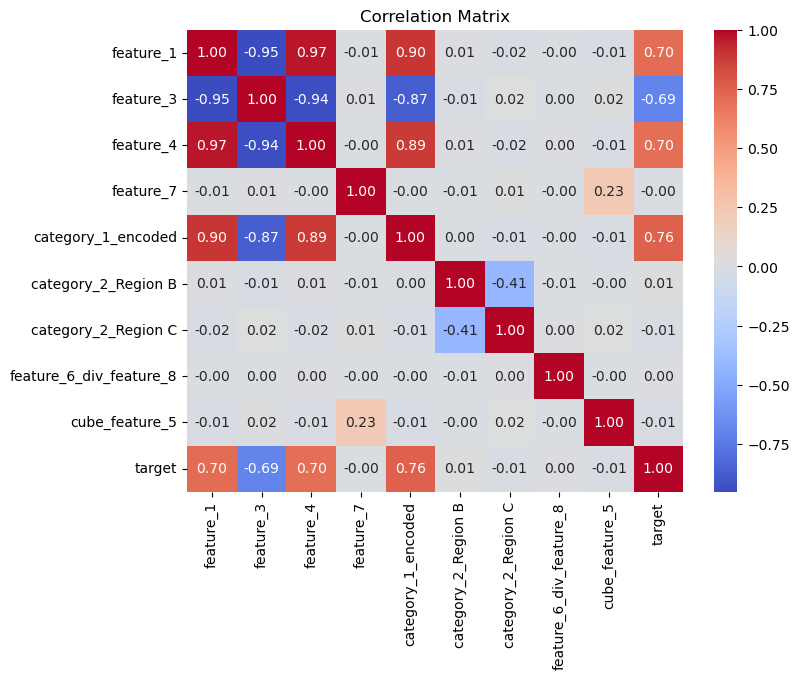

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_enginee.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 5. Modeling

In [58]:
X = data_enginee.drop('target', axis=1)  
y = data_enginee['target']  

train_data, test_data, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
def print_model_evaluation(model, train_data, target_train, test_data, target_test, model_name):
    
    model.fit(train_data, target_train)
    y_pred = model.predict(test_data)
    y_proba = model.predict_proba(test_data)  

    
    accuracy = accuracy_score(target_test, y_pred) * 100
    precision = precision_score(target_test, y_pred, average='weighted') * 100
    recall = recall_score(target_test, y_pred, average='weighted') * 100
    f1 = f1_score(target_test, y_pred, average='weighted') * 100

   
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(target_test)
    if y_test_binarized.shape[1] == 1:
        y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))
    roc_auc = roc_auc_score(y_test_binarized, y_proba, average='weighted') * 100

    
    class_report = classification_report(target_test, y_pred)
    conf_matrix = confusion_matrix(target_test, y_pred)
    
   
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.2f}%")
    print("\nClassification Report:")
    print(class_report)
    
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### Logistic Regression Model

Model: Logistic Regression
Accuracy: 85.89%
Precision: 86.07%
Recall: 85.89%
F1 Score: 85.90%
ROC-AUC Score: 93.24%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       944
         1.0       0.83      0.88      0.86       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



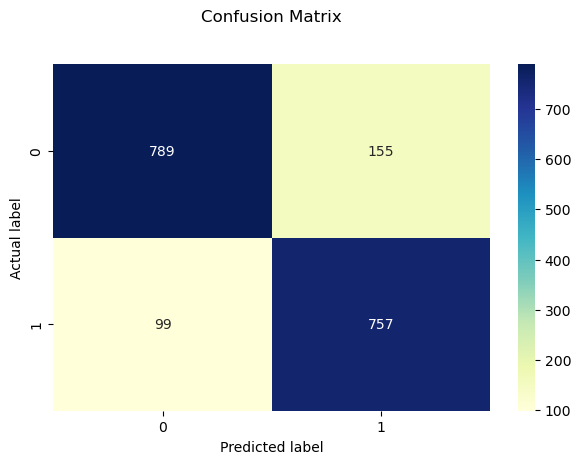

In [60]:
lr_model = LogisticRegression(class_weight='balanced')
print_model_evaluation(lr_model, train_data, target_train, test_data, target_test,'Logistic Regression')

### SVM(Support Vector Machine) Model 

Model: Support Vector Machines
Accuracy: 86.22%
Precision: 86.39%
Recall: 86.22%
F1 Score: 86.23%
ROC-AUC Score: 93.08%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       944
         1.0       0.83      0.89      0.86       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



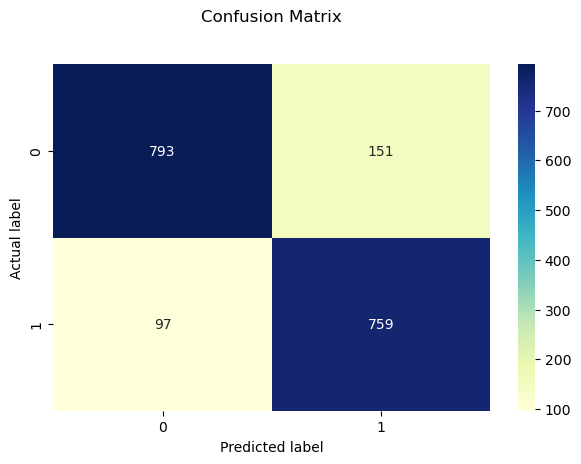

In [61]:
svm_model = SVC(probability=True)
print_model_evaluation(svm_model, train_data, target_train, test_data, target_test,'Support Vector Machines')

### Random Forest Model

Model: Random Forest Model
Accuracy: 88.67%
Precision: 88.69%
Recall: 88.67%
F1 Score: 88.65%
ROC-AUC Score: 95.71%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       944
         1.0       0.89      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



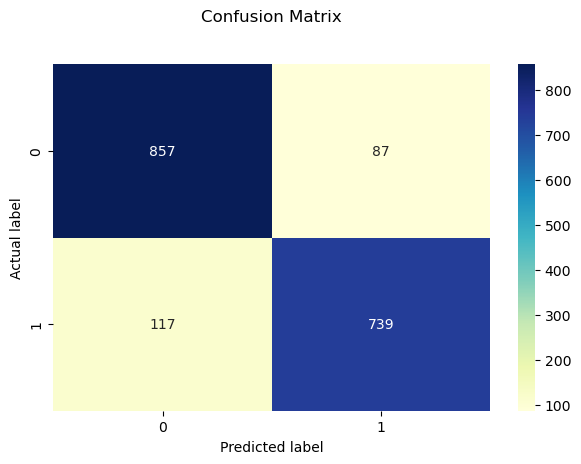

In [62]:
randomFo_model = RandomForestClassifier()
print_model_evaluation(randomFo_model, train_data, target_train, test_data, target_test,'Random Forest Model')

### Decision Tree

Model: Decision Tree Model
Accuracy: 84.28%
Precision: 84.27%
Recall: 84.28%
F1 Score: 84.27%
ROC-AUC Score: 84.21%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       944
         1.0       0.84      0.83      0.83       856

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



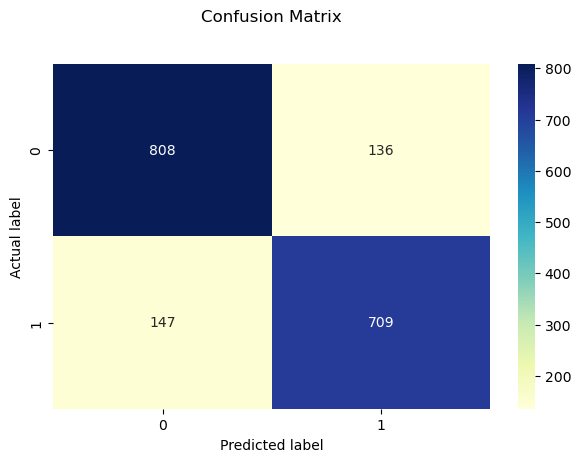

In [63]:
tree_model = DecisionTreeClassifier()
print_model_evaluation(tree_model, train_data, target_train, test_data, target_test,'Decision Tree Model')

###  Gradient Boosting

Model: Gradient Boosting Model
Accuracy: 88.22%
Precision: 88.23%
Recall: 88.22%
F1 Score: 88.21%
ROC-AUC Score: 95.90%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       944
         1.0       0.89      0.86      0.87       856

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



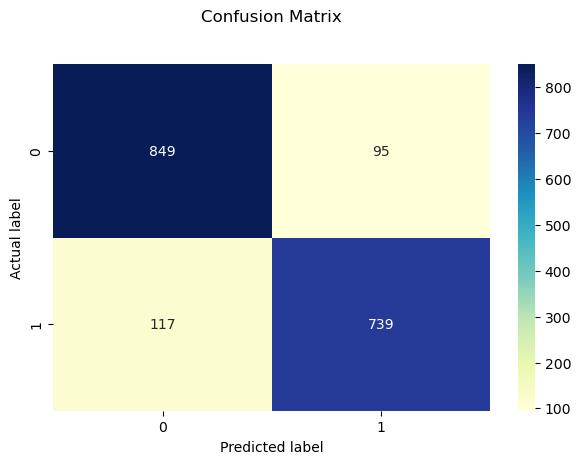

In [64]:
gb_model = GradientBoostingClassifier()
print_model_evaluation(gb_model,train_data, target_train, test_data, target_test, 'Gradient Boosting Model')

### Bagging

Model: Bagging Classifier
Accuracy: 87.50%
Precision: 87.56%
Recall: 87.50%
F1 Score: 87.48%
ROC-AUC Score: 94.45%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       944
         1.0       0.89      0.84      0.87       856

    accuracy                           0.88      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.88      0.87      1800



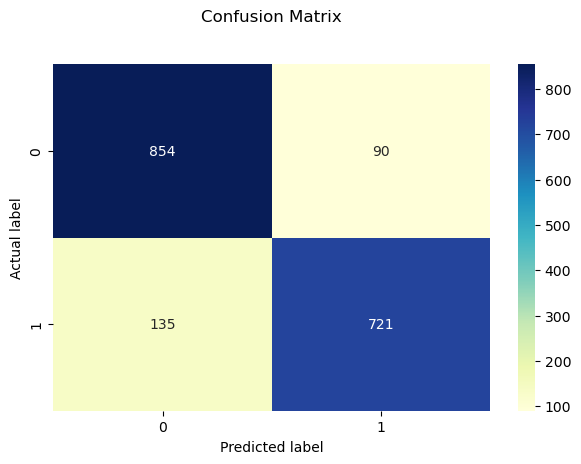

In [65]:
bagging_model = BaggingClassifier()
print_model_evaluation(bagging_model, train_data, target_train, test_data, target_test, 'Bagging Classifier')

### XGB

Model: XGBoost Model
Accuracy: 87.67%
Precision: 87.67%
Recall: 87.67%
F1 Score: 87.67%
ROC-AUC Score: 95.43%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       944
         1.0       0.87      0.87      0.87       856

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



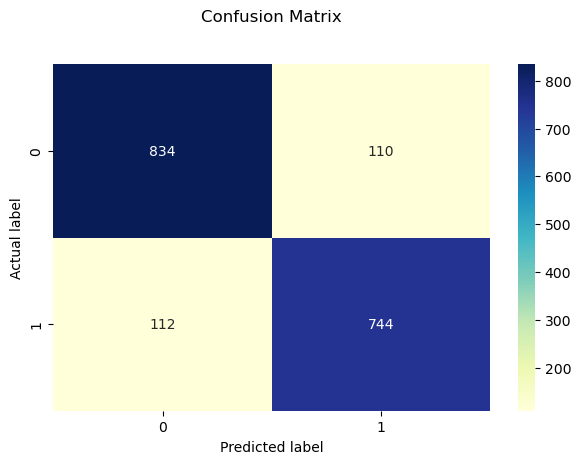

In [66]:
xgb_model = XGBClassifier()
print_model_evaluation(xgb_model, train_data, target_train, test_data, target_test, 'XGBoost Model')

### cross-validation

In [67]:
lr_rmses = -cross_val_score(lr_model, train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lr_rmses).describe()

count    10.000000
mean      0.379153
std       0.027639
min       0.339526
25%       0.357921
50%       0.377280
75%       0.397035
max       0.424918
dtype: float64

In [68]:
svm_rmses = -cross_val_score(svm_model, train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmses).describe()

count    10.000000
mean      0.377268
std       0.022271
min       0.343592
25%       0.362755
50%       0.378222
75%       0.392592
max       0.414997
dtype: float64

In [69]:
random_rmses = -cross_val_score(randomFo_model, train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(random_rmses).describe()

count    10.000000
mean      0.351123
std       0.022666
min       0.311805
25%       0.338497
50%       0.350582
75%       0.370752
max       0.381881
dtype: float64

In [70]:
tree_rmses = -cross_val_score(tree_model,  train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.409666
std       0.020218
min       0.381881
25%       0.390762
50%       0.412478
75%       0.426512
max       0.434613
dtype: float64

In [71]:
gb_rmses = -cross_val_score(gb_model,  train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(gb_rmses).describe()

count    10.000000
mean      0.343074
std       0.023451
min       0.305050
25%       0.327553
50%       0.348596
75%       0.357937
max       0.372678
dtype: float64

In [72]:
bagging_rmses = -cross_val_score(bagging_model,  train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(bagging_rmses).describe()

count    10.000000
mean      0.358922
std       0.023099
min       0.327024
25%       0.342540
50%       0.353548
75%       0.378172
max       0.390868
dtype: float64

In [73]:
xgb_model_rmses = -cross_val_score(xgb_model,  train_data, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(xgb_model_rmses).describe()

count    10.000000
mean      0.360778
std       0.011407
min       0.339526
25%       0.354043
50%       0.360361
75%       0.369395
max       0.376386
dtype: float64

## 6. Model Tuning

In [74]:
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10], 
            "max_iter": [100, 200, 300], 
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10], 
            "kernel": ["linear", "rbf"], 
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200], 
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"], 
            "max_depth": [None, 10, 20], 
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100, 200], 
            "learning_rate": [0.01, 0.1, 0.2], 
            "max_depth": [3, 5, 10]
        }
    },
    "Bagging": {
        "model": BaggingClassifier(),
        "params": {
            "n_estimators": [10, 50, 100], 
            "max_samples": [0.5, 0.7, 1.0]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 200], 
            "learning_rate": [0.01, 0.1, 0.2], 
            "max_depth": [3, 5, 10]
        }
    }
}


In [75]:
def train_and_evaluate_models(train_data, target_train, test_data, target_test):
    results = []

    for model_name, config in param_grids.items():
        print(f"\n🔹 Tuning {model_name}...")

        grid_search = GridSearchCV(config["model"], config["params"], cv=3, scoring="accuracy", n_jobs=-1)
        grid_search.fit(train_data, target_train)

       
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_

        print(f"✅ Best Parameters for {model_name}: {best_params}")

        
        y_pred = best_model.predict(test_data)

        
        accuracy = accuracy_score(target_test, y_pred)
        precision = precision_score(target_test, y_pred, average="weighted")
        recall = recall_score(target_test, y_pred, average="weighted")
        f1 = f1_score(target_test, y_pred, average="weighted")
        roc_auc = roc_auc_score(target_test, y_pred)
        class_report = classification_report(target_test, y_pred)
        conf_matrix = confusion_matrix(target_test, y_pred)

        
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

        
        print(f"📊 Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(f"ROC-AUC Score: {roc_auc:.2f}")
        print("\nClassification Report:")
        print(class_report)

        
        plt.figure(figsize=(6, 4))
        sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel("Predicted Label")
        plt.ylabel("Actual Label")
        plt.show()

    
    results_df = pd.DataFrame(results)
    print("\n📌 Model Comparison Results:")
    print(results_df.sort_values(by="Accuracy", ascending=False))

    return results_df



🔹 Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
📊 Model: Logistic Regression
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
ROC-AUC Score: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       944
         1.0       0.83      0.88      0.86       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



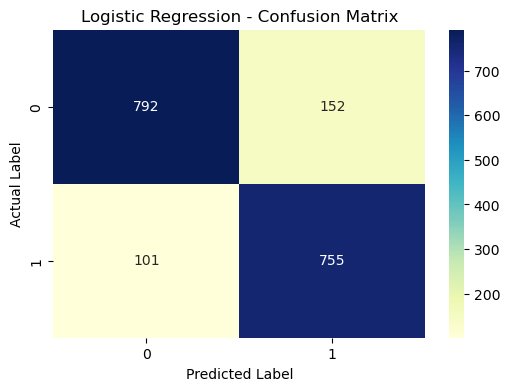


🔹 Tuning SVM...
✅ Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
📊 Model: SVM
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
ROC-AUC Score: 0.87

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       944
         1.0       0.85      0.88      0.87       856

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



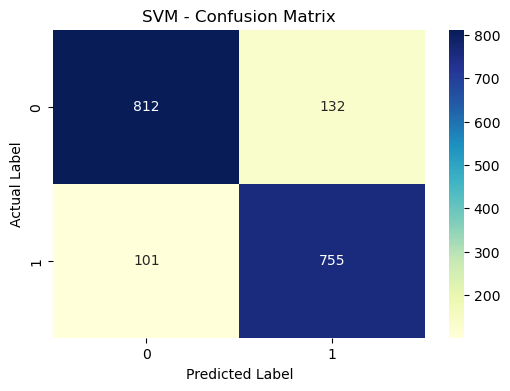


🔹 Tuning Random Forest...
✅ Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
📊 Model: Random Forest
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
ROC-AUC Score: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       944
         1.0       0.90      0.87      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



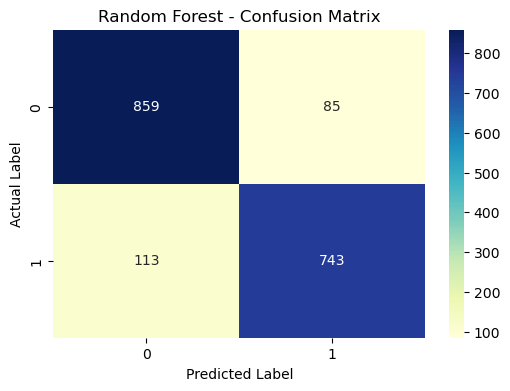


🔹 Tuning Decision Tree...
✅ Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
📊 Model: Decision Tree
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
ROC-AUC Score: 0.87

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       944
         1.0       0.89      0.83      0.86       856

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



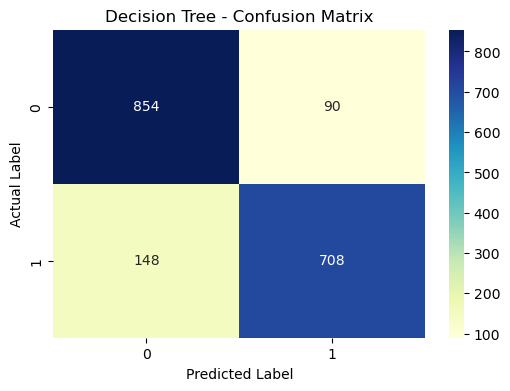


🔹 Tuning Gradient Boosting...
✅ Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
📊 Model: Gradient Boosting
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
ROC-AUC Score: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       944
         1.0       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



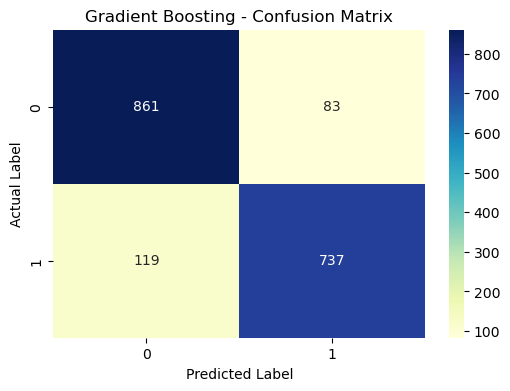


🔹 Tuning Bagging...
✅ Best Parameters for Bagging: {'max_samples': 0.5, 'n_estimators': 50}
📊 Model: Bagging
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
ROC-AUC Score: 0.88

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       944
         1.0       0.90      0.86      0.88       856

    accuracy                           0.88      1800
   macro avg       0.89      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



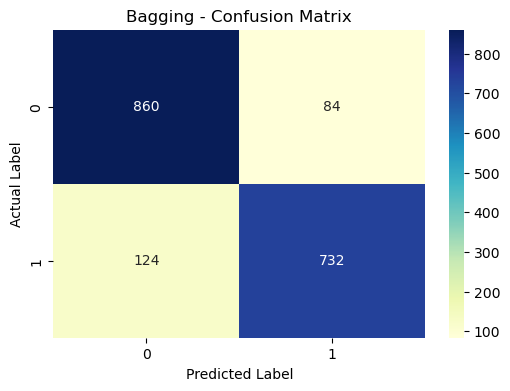


🔹 Tuning XGBoost...


C:\Users\yeniy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
📊 Model: XGBoost
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
ROC-AUC Score: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       944
         1.0       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



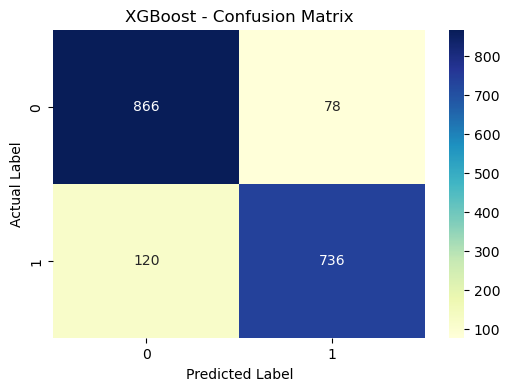


📌 Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2        Random Forest  0.890000   0.890212  0.890000  0.889889  0.888974
6              XGBoost  0.890000   0.890604  0.890000  0.889814  0.888593
4    Gradient Boosting  0.887778   0.888182  0.887778  0.887622  0.886529
5              Bagging  0.884444   0.884957  0.884444  0.884261  0.883079
1                  SVM  0.870556   0.871213  0.870556  0.870626  0.871089
3        Decision Tree  0.867778   0.868903  0.867778  0.867430  0.865882
0  Logistic Regression  0.859444   0.860988  0.859444  0.859526  0.860496


In [76]:
results_df = train_and_evaluate_models(train_data, target_train, test_data, target_test)

## 7. Model Interpretation


🔹 Feature Importance for Logistic Regression
⚠️ Logistic Regression does not have `feature_importances_` (skipping).

🔹 Feature Importance for SVM
⚠️ SVM does not have `feature_importances_` (skipping).

🔹 Feature Importance for Random Forest


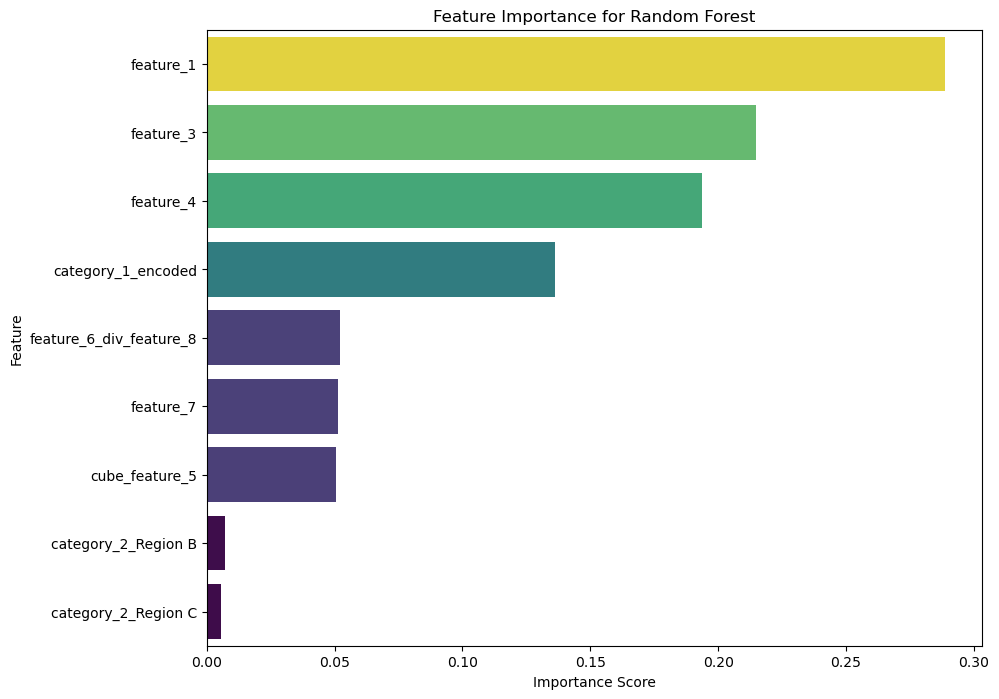

                   Feature  Importance
0                feature_1    0.288637
1                feature_3    0.214754
2                feature_4    0.193833
4       category_1_encoded    0.136277
7  feature_6_div_feature_8    0.052197
3                feature_7    0.051152
8           cube_feature_5    0.050650
5      category_2_Region B    0.006991
6      category_2_Region C    0.005508

🔹 Feature Importance for Decision Tree


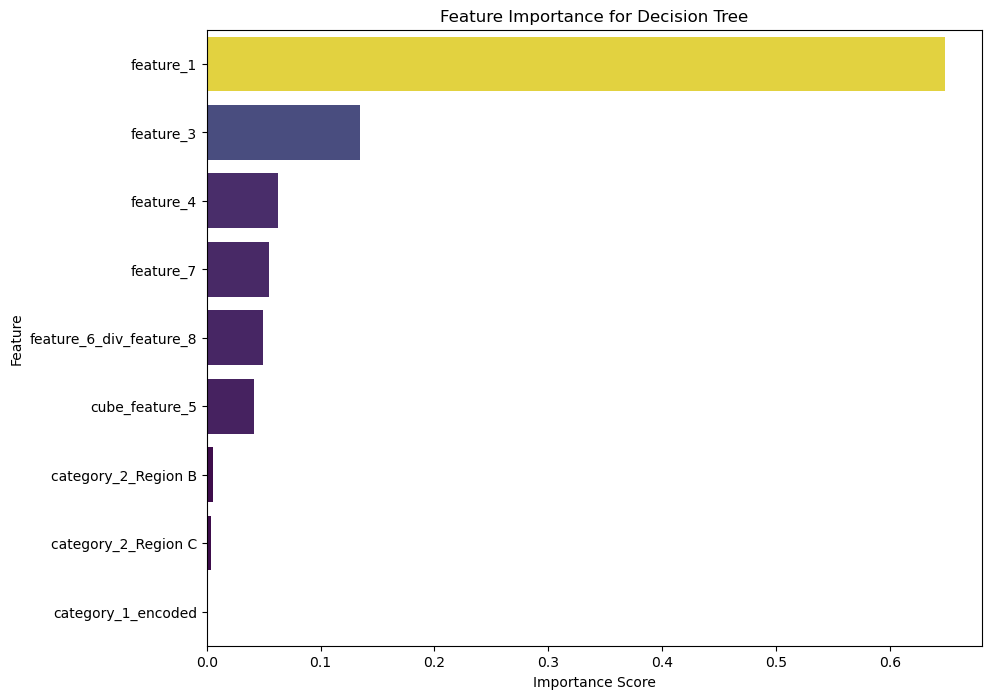

                   Feature  Importance
0                feature_1    0.648291
1                feature_3    0.134822
2                feature_4    0.062657
3                feature_7    0.054315
7  feature_6_div_feature_8    0.049431
8           cube_feature_5    0.041309
5      category_2_Region B    0.005168
6      category_2_Region C    0.003544
4       category_1_encoded    0.000464

🔹 Feature Importance for Gradient Boosting


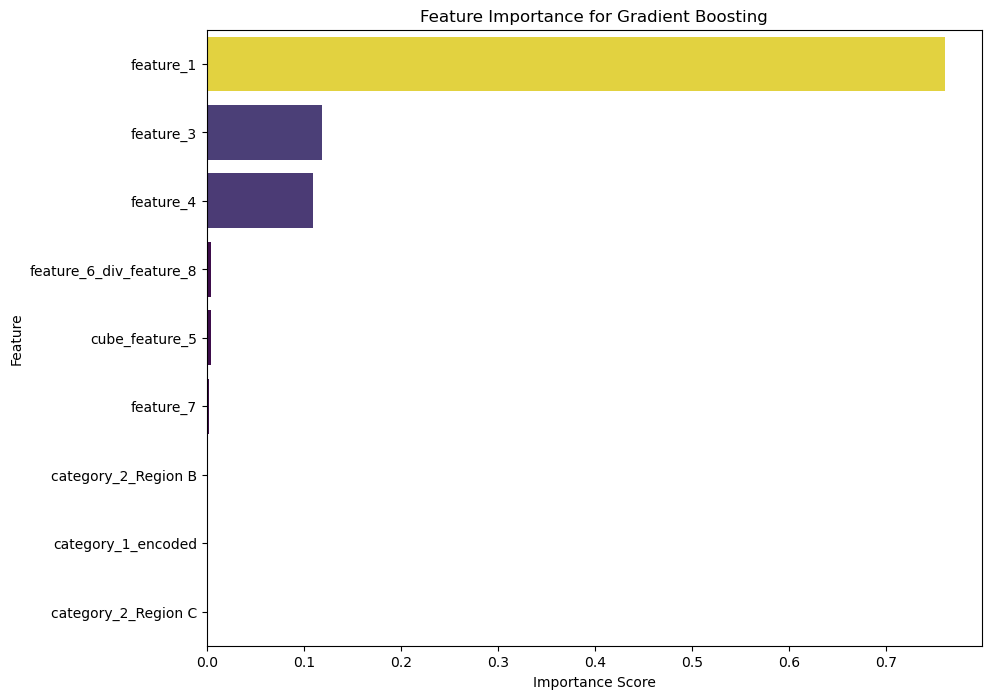

                   Feature  Importance
0                feature_1    0.760442
1                feature_3    0.118426
2                feature_4    0.109309
7  feature_6_div_feature_8    0.004859
8           cube_feature_5    0.004005
3                feature_7    0.002679
5      category_2_Region B    0.000170
4       category_1_encoded    0.000078
6      category_2_Region C    0.000033

🔹 Feature Importance for Bagging
⚠️ Bagging does not have `feature_importances_` (skipping).

🔹 Feature Importance for XGBoost


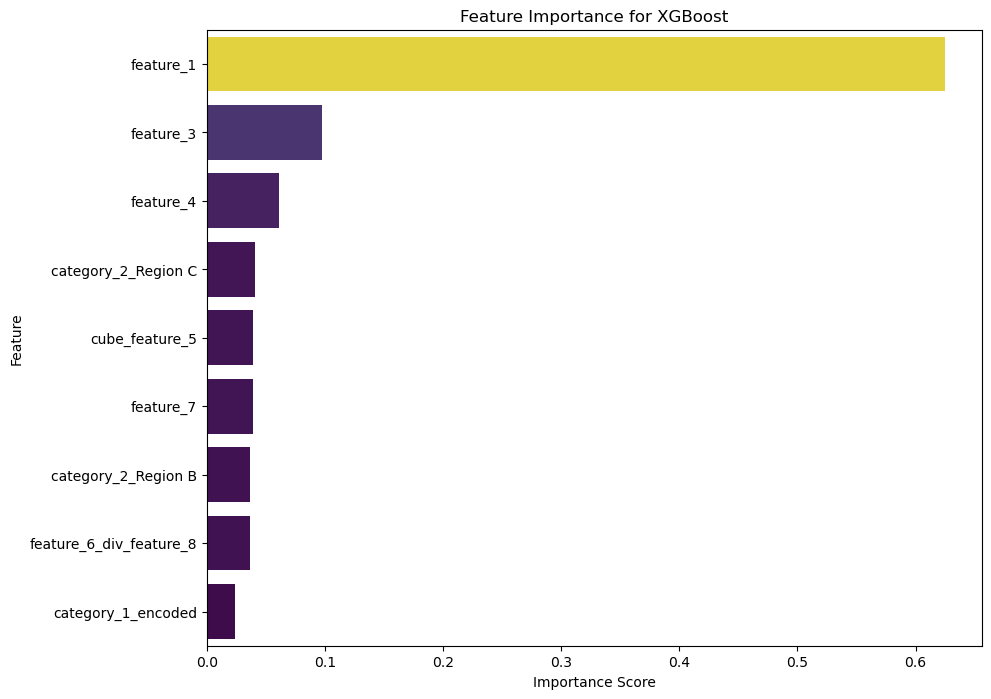

                   Feature  Importance
0                feature_1    0.624808
1                feature_3    0.097320
2                feature_4    0.061257
6      category_2_Region C    0.041141
8           cube_feature_5    0.039523
3                feature_7    0.039194
5      category_2_Region B    0.036919
7  feature_6_div_feature_8    0.036262
4       category_1_encoded    0.023578


In [77]:
def plot_feature_importance(model, model_name, X):
    
    if hasattr(model, "feature_importances_"):
        feature_importance = pd.DataFrame({
            "Feature": X.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(10, 8))
        sns.barplot(x="Importance", y="Feature", hue="Importance", data=feature_importance, palette="viridis", legend=False)
        plt.title(f"Feature Importance for {model_name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.show()

        print(feature_importance)
    else:
        print(f"⚠️ {model_name} does not have `feature_importances_` (skipping).")


models = {
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "Random Forest": randomFo_model,
    "Decision Tree": tree_model,
    "Gradient Boosting": gb_model,
    "Bagging": bagging_model,
    "XGBoost": xgb_model
}

for model_name, model in models.items():
    print(f"\n🔹 Feature Importance for {model_name}")
    plot_feature_importance(model, model_name, train_data)

In [83]:
trained_models = {
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "Random Forest": randomFo_model,
    "Decision Tree": tree_model,
    "Gradient Boosting": gb_model,
    "Bagging": bagging_model,
    "XGBoost": xgb_model
}

In [86]:
background_data = shap.kmeans(train_data, 100) 


🔹 SHAP Analysis for Logistic Regression


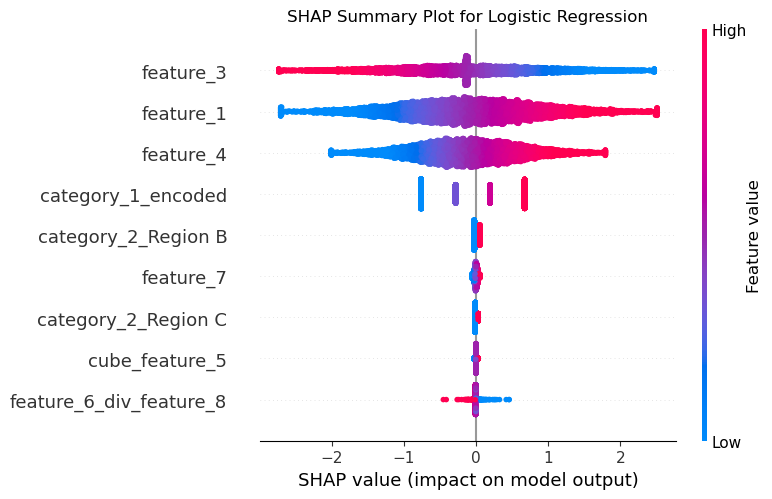


🔹 SHAP Analysis for SVM


  0%|          | 0/7200 [00:00<?, ?it/s]

In [ ]:
masker = shap.maskers.Independent(train_data)


for model_name, model in trained_models.items():
    print(f"\n🔹 SHAP Analysis for {model_name}")

    
    if model_name in ["Random Forest", "Decision Tree", "Gradient Boosting", "XGBoost"]:
        explainer = shap.TreeExplainer(model, shap.sample(train_data, 100)) 
    elif model_name == "Logistic Regression":
        explainer = shap.LinearExplainer(model, masker)  
    else:
        explainer = shap.KernelExplainer(model.predict, shap.sample(train_data, 100))  

    
    shap_values = explainer.shap_values(train_data)

    
    plt.title(f"SHAP Summary Plot for {model_name}")
    shap.summary_plot(shap_values, train_data)
